In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Cleaned Dataset
df = pd.read_csv('../Data/churn_modelling_cleaned.csv')

# Look at first 5 rows of dataset
print(df.head())

# Get a statistical summary
print(df.describe())

   rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   estimatedsalary  exited   income_group    age_group  
0        101348.88       1    High Income  Middle-Aged  
1        112542.58       0    High Income  M

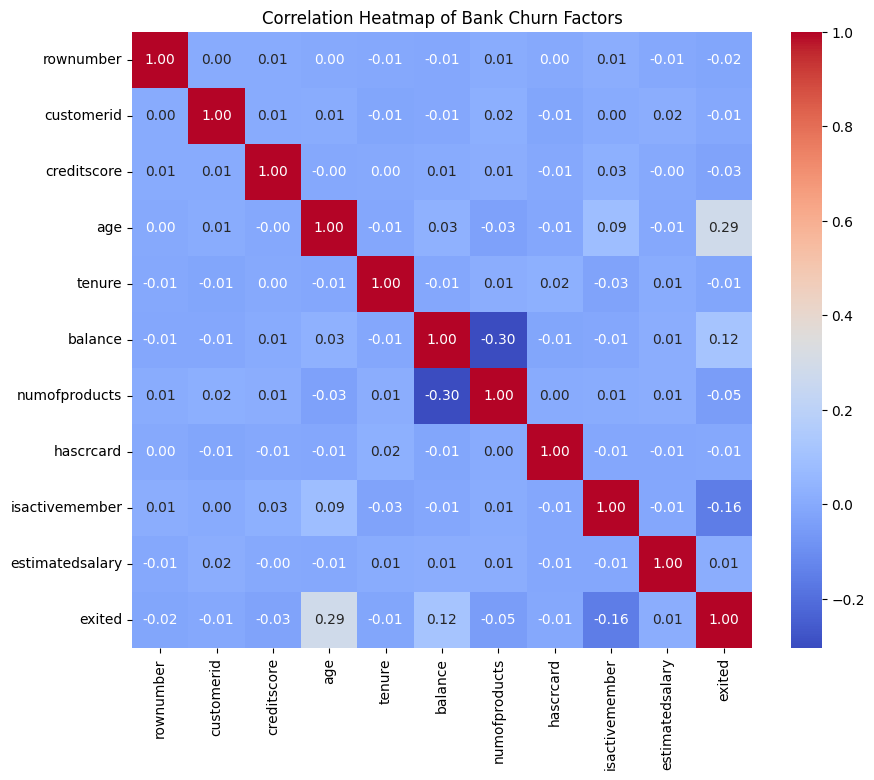

In [6]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Bank Churn Factors')
plt.show()

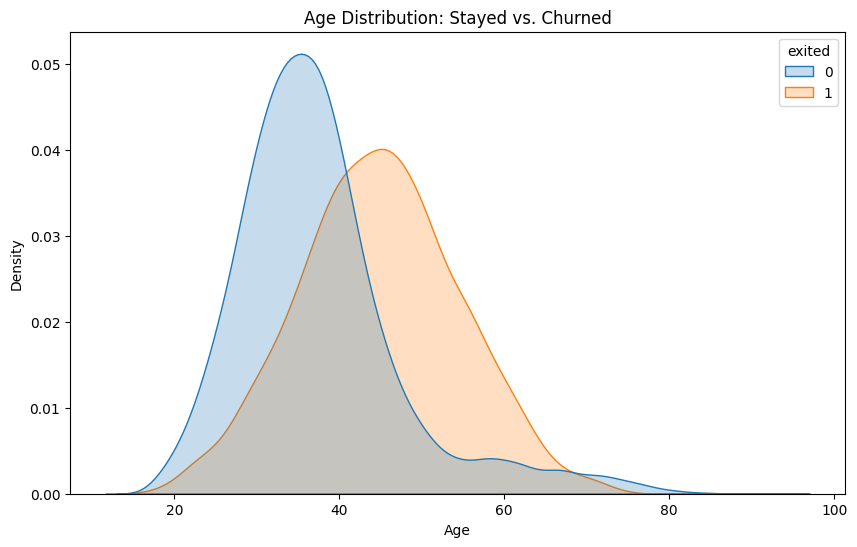

In [8]:
# Visualise distribution of age among churn group
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='exited', fill=True, common_norm=False)
plt.title('Age Distribution: Stayed vs. Churned')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

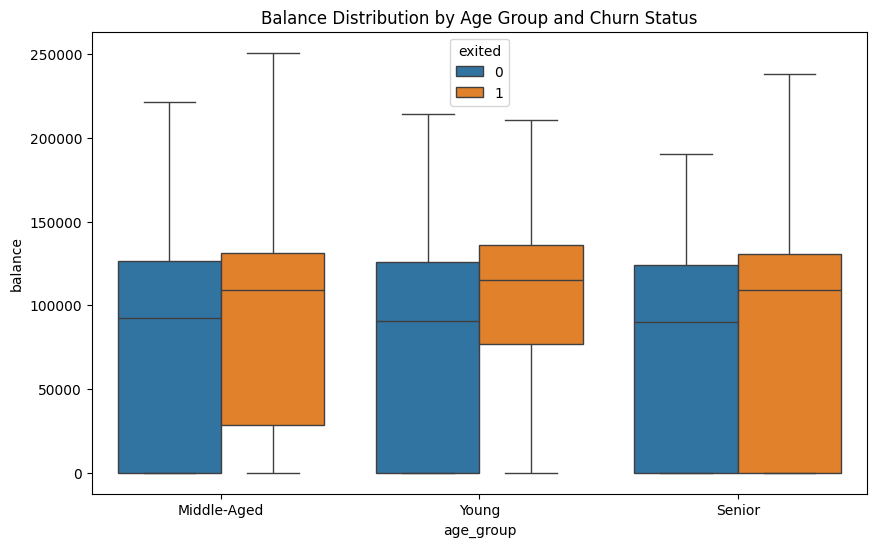

In [10]:
# Visualise Boxplot on Age Group against Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='balance', hue='exited', data=df)
plt.title('Balance Distribution by Age Group and Churn Status')
plt.show()

Rectangle(xy=(-0.4, 0), width=0.8, height=0.849412, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=0.241627, angle=0)


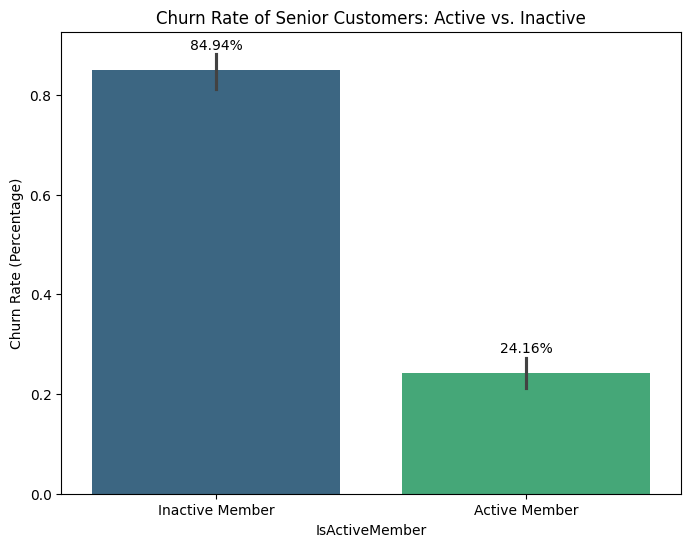

In [ ]:
# Visualise whether IsActiveMember has influence on Senior Churn Rate
# Filter the data for Seniors only
seniors_df = df[df['age_group'] == 'Senior']

# Calculate churn rates for Active vs Inactive Seniors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='isactivemember', y='exited', hue='isactivemember', data=seniors_df, palette='viridis', legend=False)

# Add labels to make it professional
plt.title('Churn Rate of Senior Customers: Active vs. Inactive')
plt.xticks([0, 1], ['Inactive Member', 'Active Member'])
plt.xlabel('IsActiveMember')
plt.ylabel('Churn Rate (Percentage)')

# Adding percentage labels on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2%'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 18), 
                textcoords = 'offset points')

plt.show()